## 牛顿法

In [1]:
import numpy as np

In [2]:
# 使用有限差分来近似微分
def df(f):
    def dd(x, epsilon=1e-10):
        return (f(x+epsilon) - f(x)) / epsilon
    return dd

In [3]:
def newton_method(f, x0, tol=1e-10, num_iter=1000):
    x = []
    x.append(x0)
    for k in range(num_iter):
        if df(f)(x[k]) == 0:  # 检查梯度为零
            print("Reconsider the initial points!")
            return None, None
        x.append(x[k] - f(x[k]) / df(f)(x[k])) # 迭代公式
        if abs(f(x[k+1])) < tol:
            print("the number of iteration: ", k+1)
            break
        
    return x[-1], x

## 1. 找到$e^x + e^{−x} −5 =x$的根

In [4]:
import matplotlib.pyplot as plt

In [5]:
f = lambda x: np.exp(x) + np.exp(-x) - 5 - x

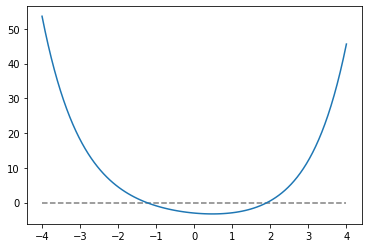

In [6]:
xn = np.linspace(-4, 4, 100)
plt.plot(xn, f(xn))
plt.hlines(0, -4, 4, linestyles='--', alpha=0.5)
plt.show()

In [7]:
root1, root1_lst = newton_method(f, 1)
root1

the number of iteration:  7


1.9115739961889915

In [8]:
root2, root2_lst = newton_method(f, -3)
root2

the number of iteration:  6


-1.243595119240117

### 迭代过程

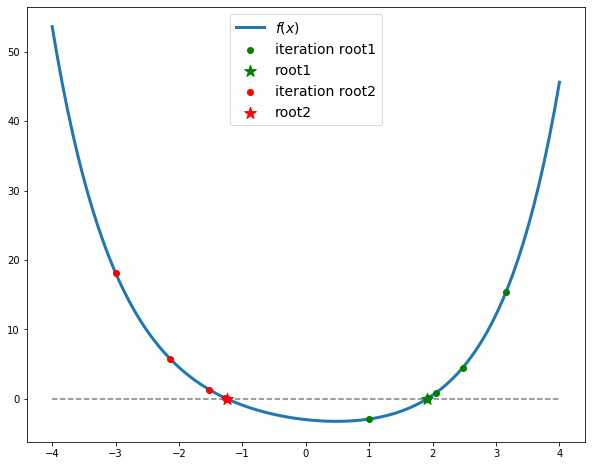

In [9]:
plt.figure(figsize=(10, 8))
plt.plot(xn, f(xn), linewidth=3, label="$f(x)$")
plt.scatter(root1_lst, f(np.array(root1_lst)), c='g',zorder=3, label="iteration root1")
plt.scatter(root1, f(root1), c='g', marker='*', zorder=5, s=150, label="root1")
plt.scatter(root2_lst, f(np.array(root2_lst)), c='r', zorder=3, label="iteration root2")
plt.scatter(root2, f(root2), c='r', marker='*', zorder=3, s=150, label="root2")
plt.hlines(0, -4, 4, linestyles='--', alpha=0.5)
plt.legend(fontsize=14)
plt.show()

### 使用`Scipy`

In [10]:
import scipy.optimize as optimize

In [11]:
fprime = lambda x: 1
optimize.newton(f, 2, fprime=fprime, maxiter=10000)

E:\a-soft\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


-inf

## 2. 找到$x^5-3x^4+25=0$的根

In [12]:
g = lambda x: x**5 - 3 * x**4 + 25

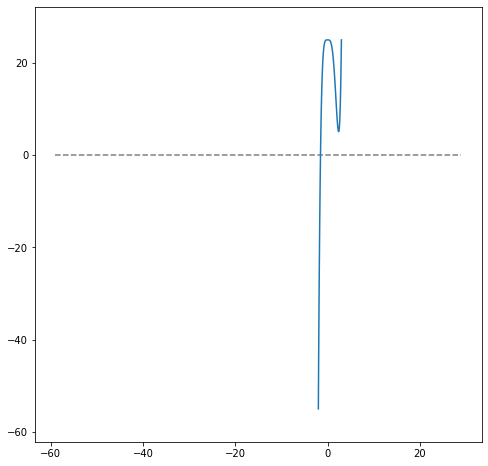

In [13]:
xn = np.linspace(-2, 3, 100)

plt.figure(figsize=(8, 8))
plt.plot(xn, g(xn))
plt.hlines(0, plt.ylim()[0], plt.ylim()[1], linestyles='--', alpha=0.5)
plt.axis('equal')
plt.show()

In [14]:
root, root_lst = newton_method(g, -3)
root

the number of iteration:  7


-1.5325002140457173

### 迭代过程

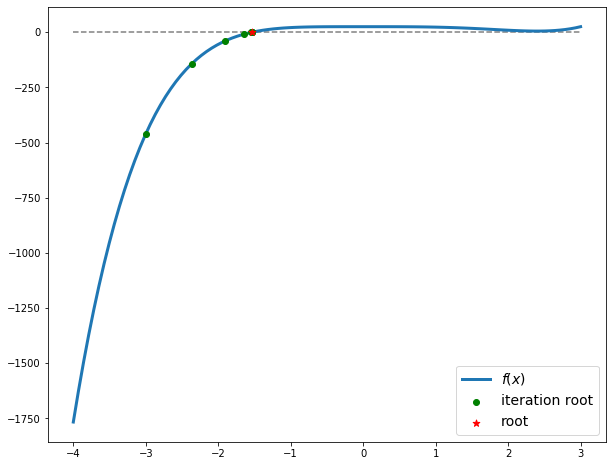

In [17]:
plt.figure(figsize=(10, 8))
xn = np.linspace(-4, 3, 100)
plt.plot(xn, g(xn), linewidth=3, label="$f(x)$")
plt.scatter(root_lst, g(np.array(root_lst)), c='g',zorder=3, label="iteration root")
plt.scatter(root, g(root), c='r', marker='*', zorder=5, s=50, label="root")
plt.hlines(0, -4, 3, linestyles='--', alpha=0.5)
plt.legend(fontsize=14)
plt.show()

In [15]:
# 失败！
root_2, root_2_lst = newton_method(g, 0.01)
root_2

Reconsider the initial points!


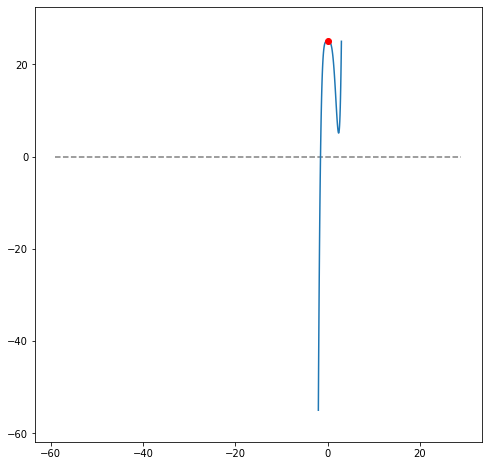

In [16]:
plt.figure(figsize=(8, 8))
plt.plot(xn, g(xn))
plt.hlines(0, plt.ylim()[0], plt.ylim()[1], linestyles='--', alpha=0.5)
plt.scatter(0.01, g(0.01), color='r', zorder=3)
plt.axis('equal')
plt.show()

### 使用`Scipy`

In [18]:
fprime = lambda x: 5 * x**4 - 12 * x**3
optimize.newton(g, -3, fprime=fprime)

-1.532500214045732

In [19]:
optimize.newton(g, 0.01, fprime=fprime, maxiter=1000)

-1.532500214045732